# Data Loading
Load the MNIST dataset using Keras.

In [ ]:
# import Necessary Libraries
from tensorflow.keras.datasets import mnist
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display dataset shapes
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


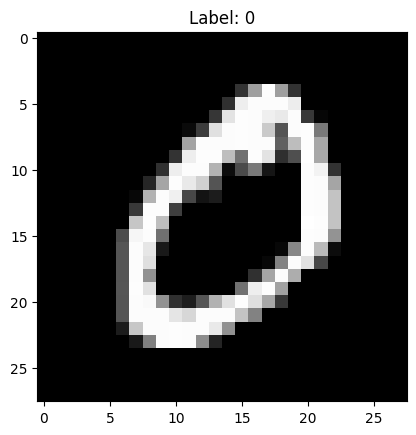

In [ ]:
# Basic data visualisation
img = x_train[1,:,:]
label = y_train[1]
plt.imshow(img, cmap="gray")
plt.title(f"Label: {label}")
plt.show()

# Data Preprocessing
Normalize the data and reshape it for CNN input.

In [ ]:
# Normalize and reshape
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Model Building
Build a CNN model using Keras Sequential API.

In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

c:\Users\bhawa\miniconda3\envs\dataScience\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# Model Compilation
Compile the model with Adam optimizer and categorical crossentropy loss.

In [ ]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training
Train the model on the training data.

In [ ]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.8436 - loss: 0.5436 - val_accuracy: 0.9762 - val_loss: 0.0836
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9781 - loss: 0.0734 - val_accuracy: 0.9852 - val_loss: 0.0547
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9868 - loss: 0.0440 - val_accuracy: 0.9839 - val_loss: 0.0562
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9896 - loss: 0.0336 - val_accuracy: 0.9882 - val_loss: 0.0404
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9929 - loss: 0.0240 - val_accuracy: 0.9888 - val_loss: 0.0377


# Model Evaluation
Evaluate the model on the test data.

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9877 - loss: 0.0385
Test Loss: 0.031000744551420212
Test Accuracy: 0.9900000095367432


# Prediction
Make predictions on new data samples.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


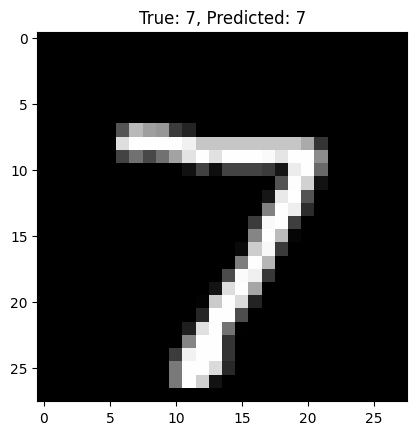

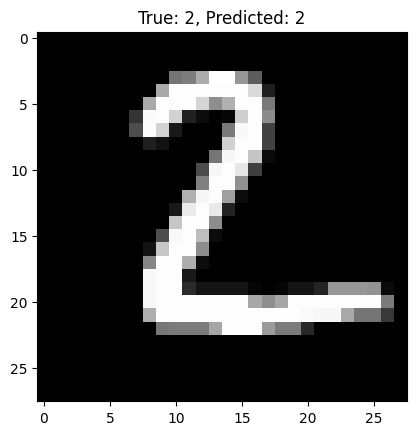

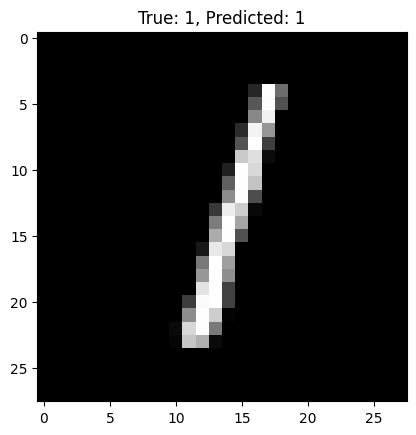

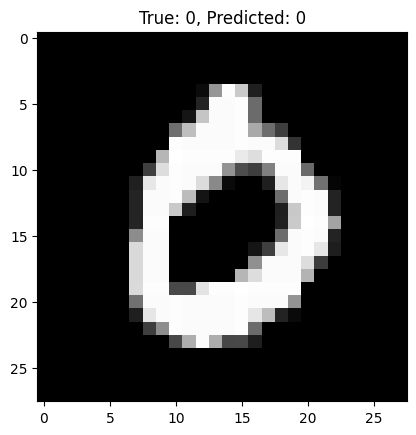

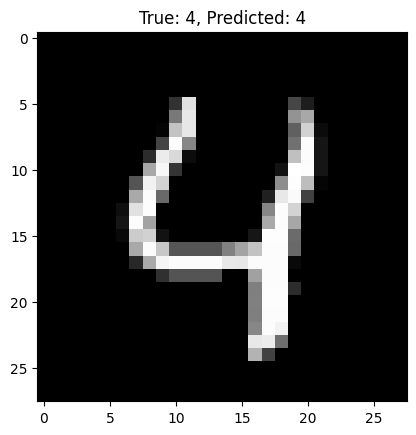

In [ ]:
# Predict on a few test samples
predictions = model.predict(x_test[:5])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test[:5], axis=1)

# Display predictions
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_classes[i]}, Predicted: {predicted_classes[i]}")
    plt.show()